## Observations and Insights 

- Of the four promising treatment regimens, Capomulin and Ramicane appear to be the most effective. Those mice had significatly smaller tumors at the last Timepoint.

- Also of the four promising treatment regimens, only Infubinol had an outlier for its final tumor volume.

- In the study for Capomulin, there is a strong correlations between the average tumor volume and average weight of the mouse.

In [143]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [3]:
# Combine the data into a single dataset
Merge_df=pd.merge(mouse_metadata, study_results, on= "Mouse ID")

# Display the data table for preview
Merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking out the Data 
Merge_df["Drug Regimen"].unique()

array(['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin',
       'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'],
      dtype=object)

In [151]:
Merge_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [152]:
Merge_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [5]:
# Checking the number of mice.
Unique_Mice=Merge_df["Mouse ID"].unique()
Total_Mice= len(Unique_Mice)
Total_Mice


249

In [153]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

Duplicate_id = Merge_df.loc[Merge_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()

In [154]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = Merge_df.loc[Merge_df["Mouse ID"] == "g989"]
duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [155]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
No_Duplicate = Merge_df[Merge_df['Mouse ID'].isin(Duplicate_id)==False]
No_Duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [156]:
# Checking the number of mice in the clean DataFrame.
Unique_No_Duplicate_Time = No_Duplicate["Mouse ID"].unique()
len(Unique_No_Duplicate_Time)

248

## Summary Statistics

In [11]:
# Notes to myself
# Drugs
#'Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol'

In [157]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Regimen_Groups = No_Duplicate.groupby(["Drug Regimen"])

Mean_Tumor = Regimen_Groups["Tumor Volume (mm3)"].mean()
Median_Tumor = Regimen_Groups["Tumor Volume (mm3)"].median()
Variance_Tumor = Regimen_Groups["Tumor Volume (mm3)"].var()

Standard_Deviation_Tumor = Regimen_Groups["Tumor Volume (mm3)"].std()
SEM_Tumor = Regimen_Groups["Tumor Volume (mm3)"].sem()

Summary_df = pd.DataFrame({"Mean": Mean_Tumor, "Median": Median_Tumor, "Variance": Variance_Tumor, "Standard Deviation": Standard_Deviation_Tumor, "SEM": SEM_Tumor})
Summary_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [158]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
Summary_Table = No_Duplicate.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
Summary_Table

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [159]:
Sum_of_Measurements = Regimen_Groups["Tumor Volume (mm3)"].count()
Sum_of_Measurements

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

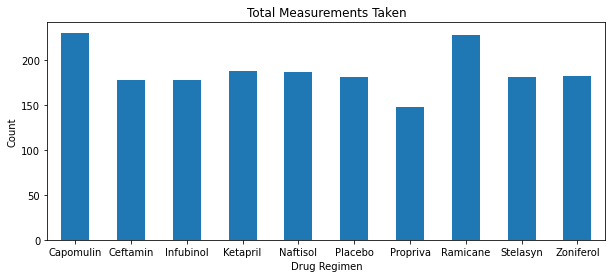

In [162]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.


Sum_of_Measurements.plot(kind="bar", figsize = (10,4), rot=0)
plt.title("Total Measurements Taken")
plt.ylabel("Count")

plt.show()

In [163]:
Drug_List = Sum_of_Measurements.index.tolist()
Drug_List

['Capomulin',
 'Ceftamin',
 'Infubinol',
 'Ketapril',
 'Naftisol',
 'Placebo',
 'Propriva',
 'Ramicane',
 'Stelasyn',
 'Zoniferol']

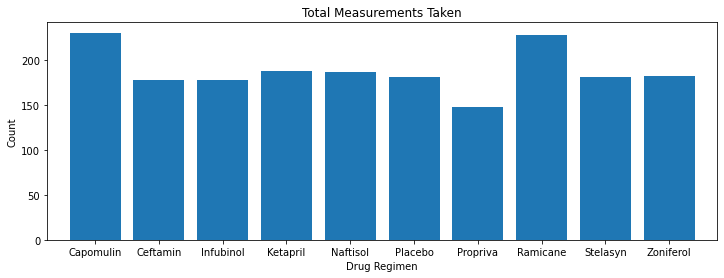

In [164]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
x_axis = np.arange(len(Sum_of_Measurements))
plt.figure(figsize= (12,4))
plt.bar(x_axis,Sum_of_Measurements)
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin','Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva',
                            'Ramicane', 'Stelasyn', 'Zoniferol'])
plt.xlim(-0.75, len(x_axis)-.25)
plt.title("Total Measurements Taken")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")

plt.show()

In [166]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
Gender_Group =(No_Duplicate.groupby(["Mouse ID", "Sex"]))

Male_Mice = Gender_Group["Sex"] == "Male"
Male_Mice
Gender_Count = Gender_Group["Sex"].value_counts()

In [167]:
Gender_Once = No_Duplicate.drop_duplicates(["Mouse ID", "Sex"], keep="first")
Sex = Gender_Once["Sex"].value_counts()
Sex

Male      125
Female    123
Name: Sex, dtype: int64

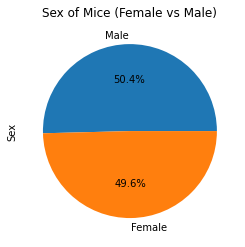

In [168]:
#Gender_Pie = Gender_Sum.plot(kind="pie", y="Sex", title= "Distribution of Female vs Male")
Gender_Pie = Sex.plot(kind="pie", y="Sex", autopct="%1.1f%%", title = "Sex of Mice (Female vs Male)")

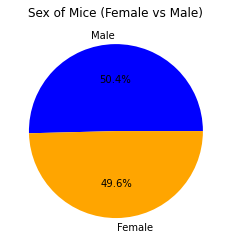

In [169]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Labels = ["Male", "Female"]
Sizes = [125, 123]
Colors = ["blue", "orange"]
plt.title("Sex of Mice (Female vs Male)")
plt.pie(Sizes , labels = Labels, colors = Colors, autopct="%1.1f%%")

plt.show()


## Quartiles, Outliers and Boxplots

In [170]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
#No_Duplicate
# Start by getting the last (greatest) timepoint for each mouse

Greatest_Timepoint = No_Duplicate.groupby("Mouse ID").max()["Timepoint"]
Greatest_Timepoint

Mouse ID
a203    45
a251    45
a262    45
a275    45
a366    30
        ..
z435    10
z578    45
z581    45
z795    45
z969    45
Name: Timepoint, Length: 248, dtype: int64

In [171]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Greatest_Timepoint_Merge = pd.merge(Greatest_Timepoint, No_Duplicate, on= ("Mouse ID", "Timepoint"), how= "left")
Greatest_Timepoint_Merge

Treatment_Group = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
Treatment_Mice = Greatest_Timepoint_Merge.loc[Greatest_Timepoint_Merge["Drug Regimen"].isin(Treatment_Group)]
Treatment_Mice

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


In [172]:
Drug_Groups = Treatment_Mice.groupby("Mouse ID").last()[["Drug Regimen", "Tumor Volume (mm3)"]]
Drug_Groups = Drug_Groups.reset_index()

Drug_Groups.head(10)

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
0,a203,Infubinol,67.973419
1,a251,Infubinol,65.525743
2,a275,Ceftamin,62.999356
3,a411,Ramicane,38.407618
4,a444,Ramicane,43.047543
5,a520,Ramicane,38.810366
6,a577,Infubinol,57.031862
7,a644,Ramicane,32.978522
8,a685,Infubinol,66.083066
9,b128,Capomulin,38.982878


In [173]:
Drug_Groups.loc[Drug_Groups["Drug Regimen"]== "Capomulin",'Tumor Volume (mm3)']

9     38.982878
12    38.939633
24    30.485985
25    37.074024
26    40.159220
32    47.685963
33    37.311846
34    38.125164
35    38.753265
45    41.483008
49    38.846876
51    28.430964
53    33.329098
64    46.539206
65    32.377357
68    41.581521
70    23.343598
72    40.728578
73    34.455298
78    31.023923
82    40.658124
83    39.952347
88    36.041047
90    28.484033
96    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [174]:
Treatment_List = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

Tumor_Volume_List =[]

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in Treatment_List:
    Filtered = Drug_Groups["Tumor Volume (mm3)"].loc[Drug_Groups["Drug Regimen"]== drug]

    Tumor_Volume_List.append(Filtered)
    
    # Calculating Upper and Lower Quartiles and IQR
    Quartiles = Filtered.quantile([.25,.5,.75])

    LowerQ = Quartiles[.25]
    UpperQ = Quartiles[.75]
    IQR = UpperQ-LowerQ
    
    # Determining potential outliers
    Lower_Bound = LowerQ - (1.5*IQR)
    Upper_Bound = UpperQ + (1.5*IQR)

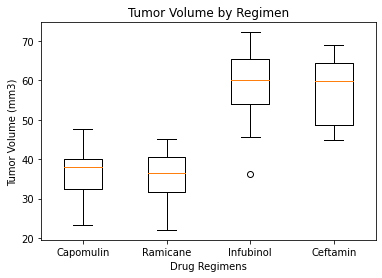

In [185]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volume by Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_xlabel("Drug Regimens")

ax1.boxplot(Tumor_Volume_List, labels = Treatment_List)


plt.show()

## Line and Scatter Plots

In [176]:
No_Duplicate.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [177]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_Mice = No_Duplicate.loc[No_Duplicate["Drug Regimen"] == "Capomulin",:]
Capomulin_Mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [178]:
Single_Mouse = Capomulin_Mice.groupby(["Mouse ID"])
s185_Mouse = Single_Mouse.get_group("s185")
s185_Mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


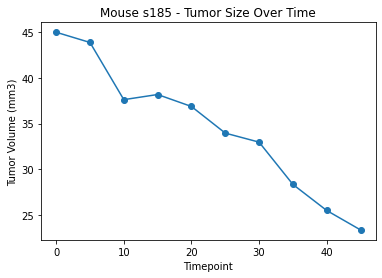

In [179]:
plt.plot(s185_Mouse["Timepoint"], s185_Mouse["Tumor Volume (mm3)"], marker= "o")
plt.title ("Mouse s185 - Tumor Size Over Time")
plt.xlabel ("Timepoint")
plt.ylabel ("Tumor Volume (mm3)")

plt.show()

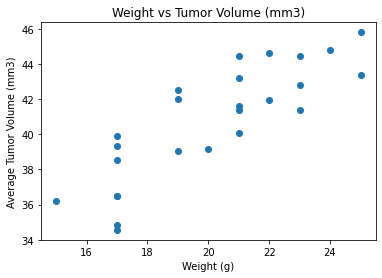

In [180]:
Capomulin_Mean = Capomulin_Mice.groupby("Mouse ID").mean()

X_Axis = Capomulin_Mean ["Weight (g)"]
Y_Axis = Capomulin_Mean ["Tumor Volume (mm3)"]

plt.scatter(X_Axis, Y_Axis)
plt.title("Weight vs Tumor Volume (mm3)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()

## Correlation and Regression

In [182]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {round(st.pearsonr(X_Axis, Y_Axis)[0],2)}")

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


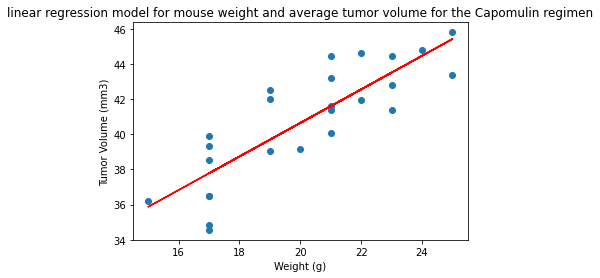

In [183]:
# linear regression model 
x_values = Capomulin_Mean ["Weight (g)"]
y_values = Capomulin_Mean ["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title ("linear regression model for mouse weight and average tumor volume for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()